In [10]:
import numpy as np

np.random.seed(0)
x = np.sort(5*np.random.rand(400,1),axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(x).ravel()

print(x[:10])
print(T[:10])
print(y[:10])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]
 [0.08214815]
 [0.09260897]
 [0.093949  ]
 [0.09596599]
 [0.10053773]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]
 [0.0501002 ]
 [0.06012024]
 [0.07014028]
 [0.08016032]
 [0.09018036]]
[0.02347522 0.05710621 0.05853694 0.06613598 0.08155185 0.08205579
 0.09247665 0.09381086 0.09581876 0.10036845]


In [11]:
#타깃 데이터에 노이즈 추가
y[::1] += 1 * (0.5 -np.random.rand(400))


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [13]:
#uniform 은 가중치 x
#distance는 거리가 가까우면 가중치 o
from sklearn.neighbors import KNeighborsRegressor

knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(x_train,y_train)
knn_dis.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [15]:
uni_pred = knn_uni.predict(x_test)
dis_pred = knn_dis.predict(x_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

preds = [uni_pred, dis_pred]
weights = ['uniform','distance']
evls = ['mse','rmse','mae']

results = pd.DataFrame(index = weights, columns=evls)

for pred, nm in zip(preds,weights):
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


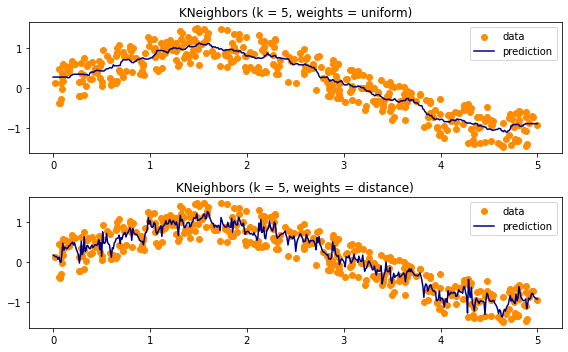

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for i, weights in enumerate(['uniform','distance']):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(x,y).predict(T)
    plt.subplot(2,1,i+1)
    plt.scatter(x,y, color = 'darkorange',label='data')
    plt.plot(T,y_, color = 'navy',label = 'prediction')
    plt.axis('tight')
    plt.legend()
    plt.title('KNeighbors (k = %i, weights = %s)'%(5,weights))
    
plt.tight_layout()
plt.show()